In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# getting the csv file
os.chdir('C:\\Users\\Khizar\\Desktop\\Semester - Spring 2021\\5 - Machine Learning 4375\\CSV')
path = os.getcwd()
path

# setting data frame
df = pd.read_csv('loan_data.csv')

In [2]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,debt_consolidation,0.1836,630.39,11.877569,29.96,667,13979.041670,212629,87.4,3,0,0,1
1,0,credit_card,0.1576,192.72,10.691945,29.95,692,2790.000000,26313,58.5,9,0,2,0
2,0,all_other,0.1791,144.43,10.868568,29.90,662,3119.958333,15473,65.3,0,1,0,0
3,0,educational,0.1759,107.85,10.759072,29.74,662,4500.000000,2663,20.3,0,1,0,0
4,0,debt_consolidation,0.1797,361.38,11.289782,29.72,672,8489.958333,25879,77.2,2,3,0,0


In [3]:
# checking the total values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
# checking null values 
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [5]:
# ^^ looks like there are no missing areas in the data
# dropping null rows just in case
df.dropna()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,debt_consolidation,0.1836,630.39,11.877569,29.96,667,13979.041670,212629,87.4,3,0,0,1
1,0,credit_card,0.1576,192.72,10.691945,29.95,692,2790.000000,26313,58.5,9,0,2,0
2,0,all_other,0.1791,144.43,10.868568,29.90,662,3119.958333,15473,65.3,0,1,0,0
3,0,educational,0.1759,107.85,10.759072,29.74,662,4500.000000,2663,20.3,0,1,0,0
4,0,debt_consolidation,0.1797,361.38,11.289782,29.72,672,8489.958333,25879,77.2,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,educational,0.0800,15.67,8.101678,0.00,747,570.000000,0,0.0,0,0,0,0
9574,0,major_purchase,0.1411,71.89,9.998798,0.00,727,870.000000,312,4.2,3,0,0,0
9575,0,educational,0.1947,184.49,9.210340,0.00,682,541.000000,0,0.0,0,0,0,0
9576,0,major_purchase,0.1461,124.12,10.239960,0.00,692,1530.041667,0,0.0,6,0,0,0


In [6]:
# setting x and y values. Y is not fully paid of loan. X is the rest of the columns
x = pd.get_dummies(df.drop('not.fully.paid', axis = 1), drop_first = True)
y = df['not.fully.paid']

In [7]:
# Importing train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [9]:
# importing classifier
# creating Decision Tree Model and fitting x and y.
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
predicting = model.predict(x_test)

In [12]:
# getting classification report
print (classification_report(y_test,predicting))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2401
           1       0.21      0.20      0.21       473

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.74      0.74      2874



In [14]:
# Getting confusion matrix
print (confusion_matrix(y_test, predicting))

[[2039  362]
 [ 377   96]]


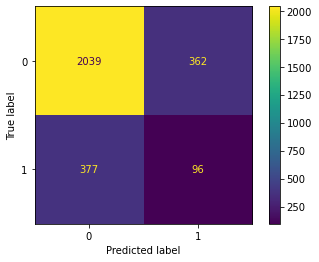

In [15]:
# Plotting the confusion matrix
plot_confusion_matrix(model, x_test, y_test)

In [16]:
# checking important categories in the model
model.feature_importances_
pd.DataFrame(index = x.columns, data = model.feature_importances_, columns = ['Important Categories'])

,Important Categories
credit.policy,0.008662
int.rate,0.102465
installment,0.106464
log.annual.inc,0.111273
dti,0.113354
fico,0.082264
days.with.cr.line,0.134082
revol.bal,0.115969
revol.util,0.108195
inq.last.6mths,0.053970


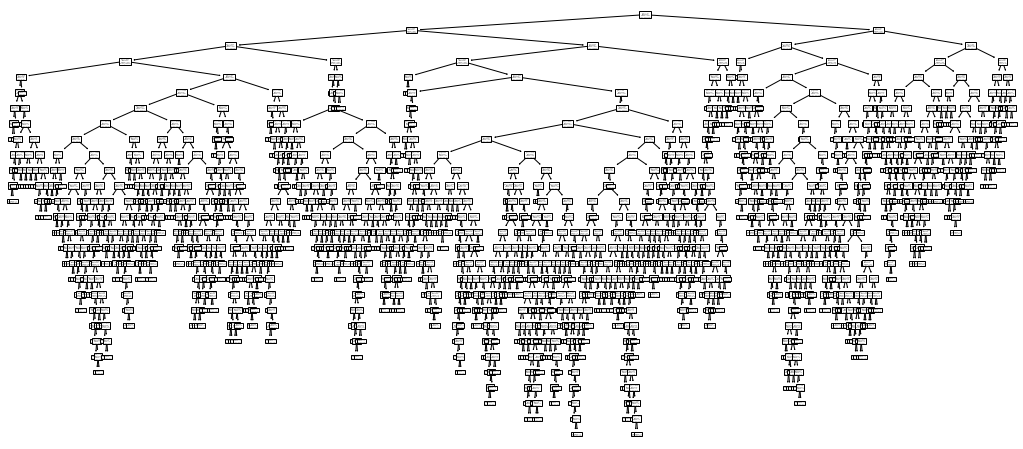

In [17]:
# Importing library
from sklearn.tree import plot_tree
plt.figure(figsize=(18,8)) # Seting Figure Size
# plotting model
plot_tree(model);

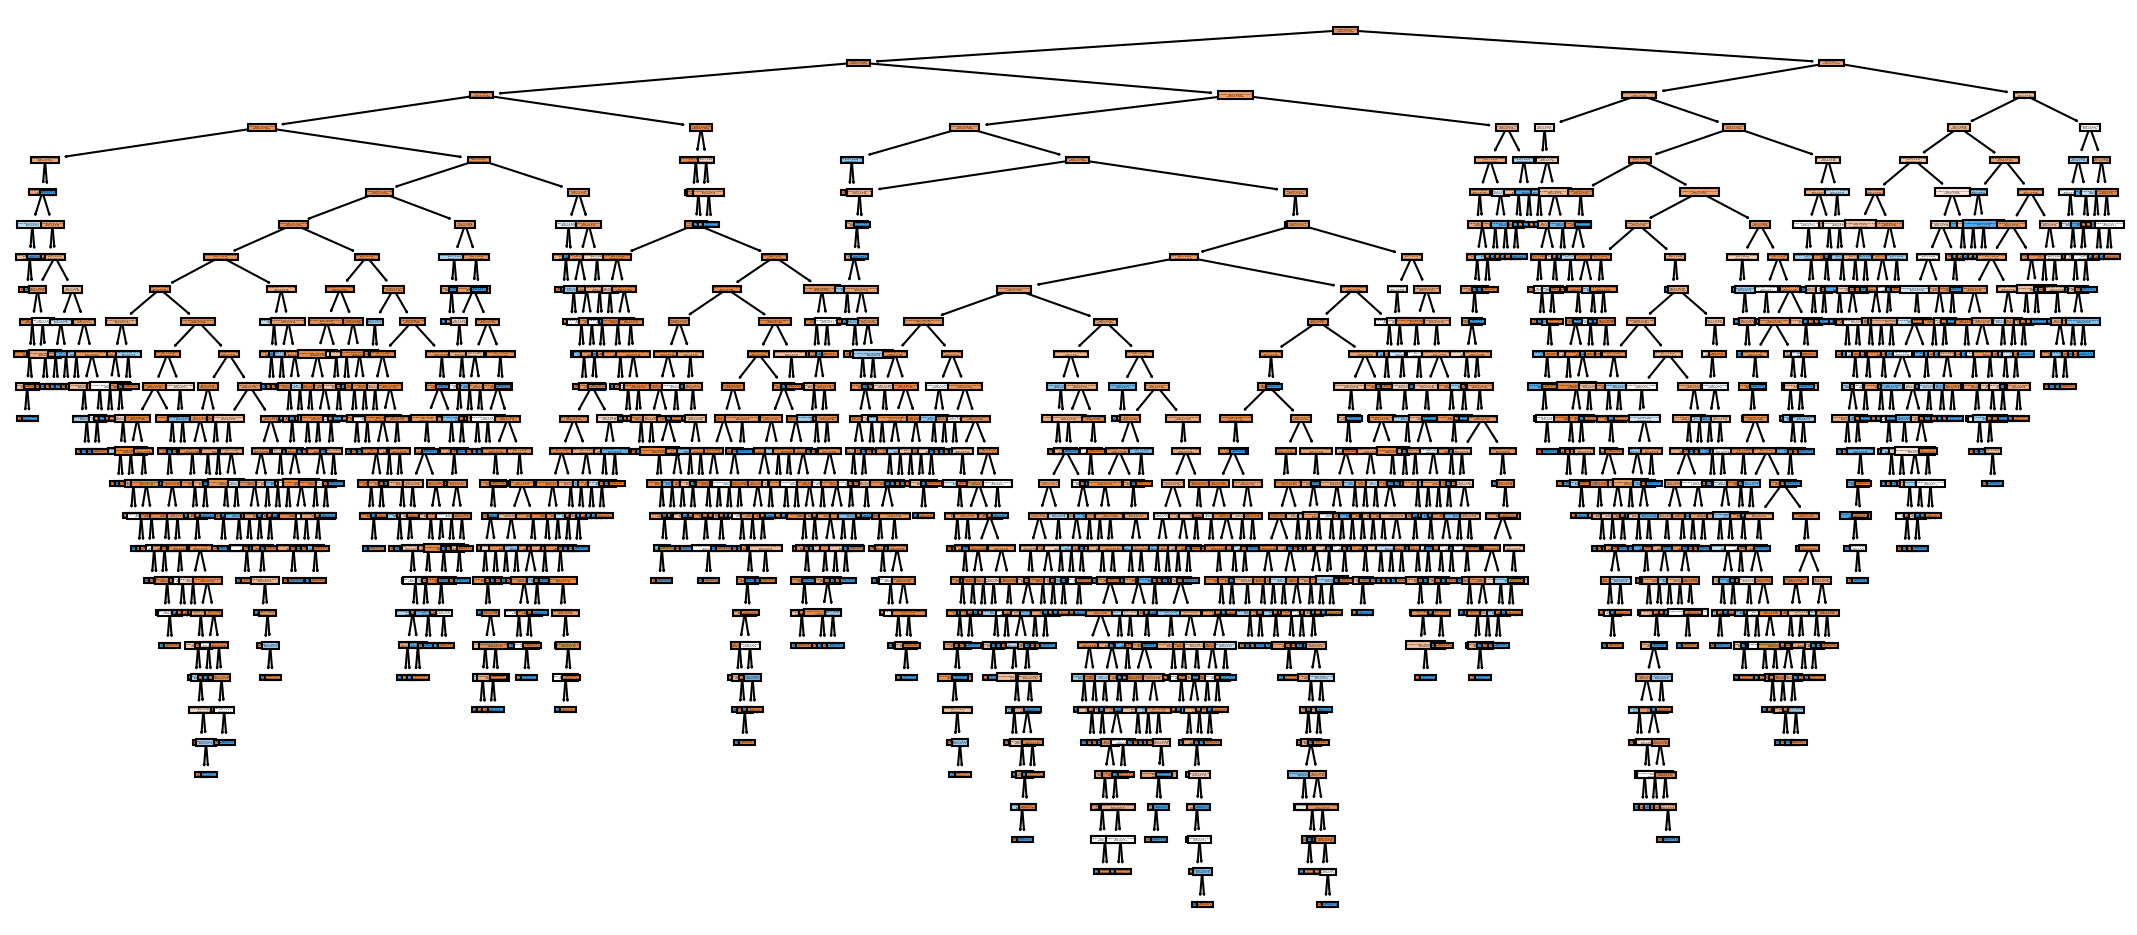

In [18]:
# Change DPI to differentiate
plt.figure(figsize = (18,8), dpi = 150) # Controlling Figure Size and DPI
plot_tree(model, filled = True, feature_names = x.columns);

In [19]:
# Plotting xtest and classification report and plotting on pruned tree model
def report_model(model):
    model_predictor = model.predict(x_test)
    print(classification_report(y_test, model_predictor))
    print('\n')
    plt.figure(figsize = (12,8),dpi = 150)
    plot_tree(model, filled = True, feature_names = x.columns);

In [20]:
pruned_tree = DecisionTreeClassifier(max_depth = 2)
pruned_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

C:\Users\Khizar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2401
           1       0.00      0.00      0.00       473

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874





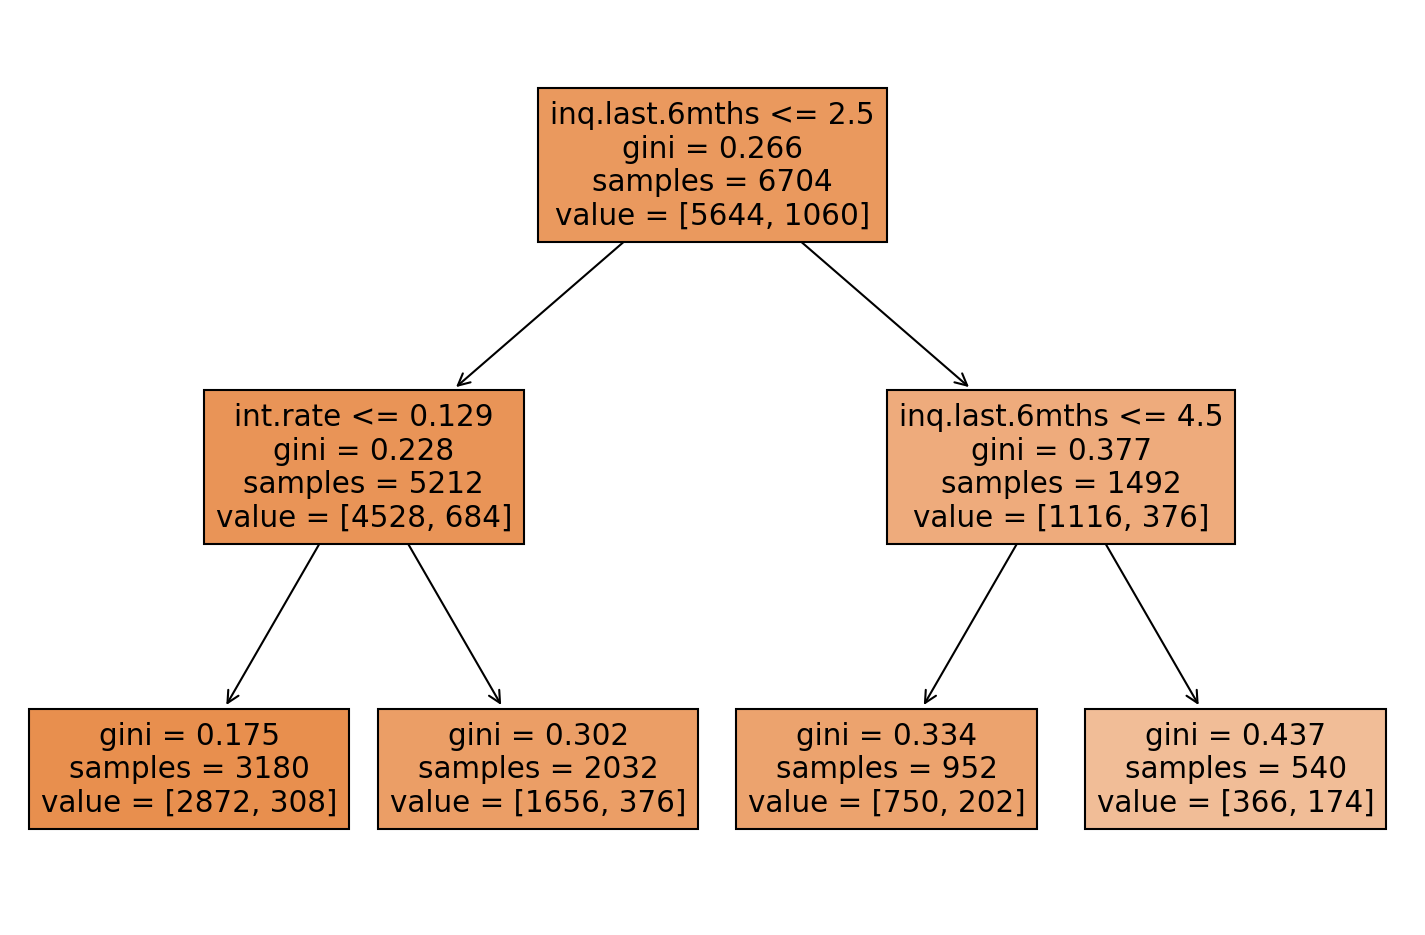

In [21]:
report_model(pruned_tree)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2401
           1       0.19      0.20      0.20       473

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.73      2874





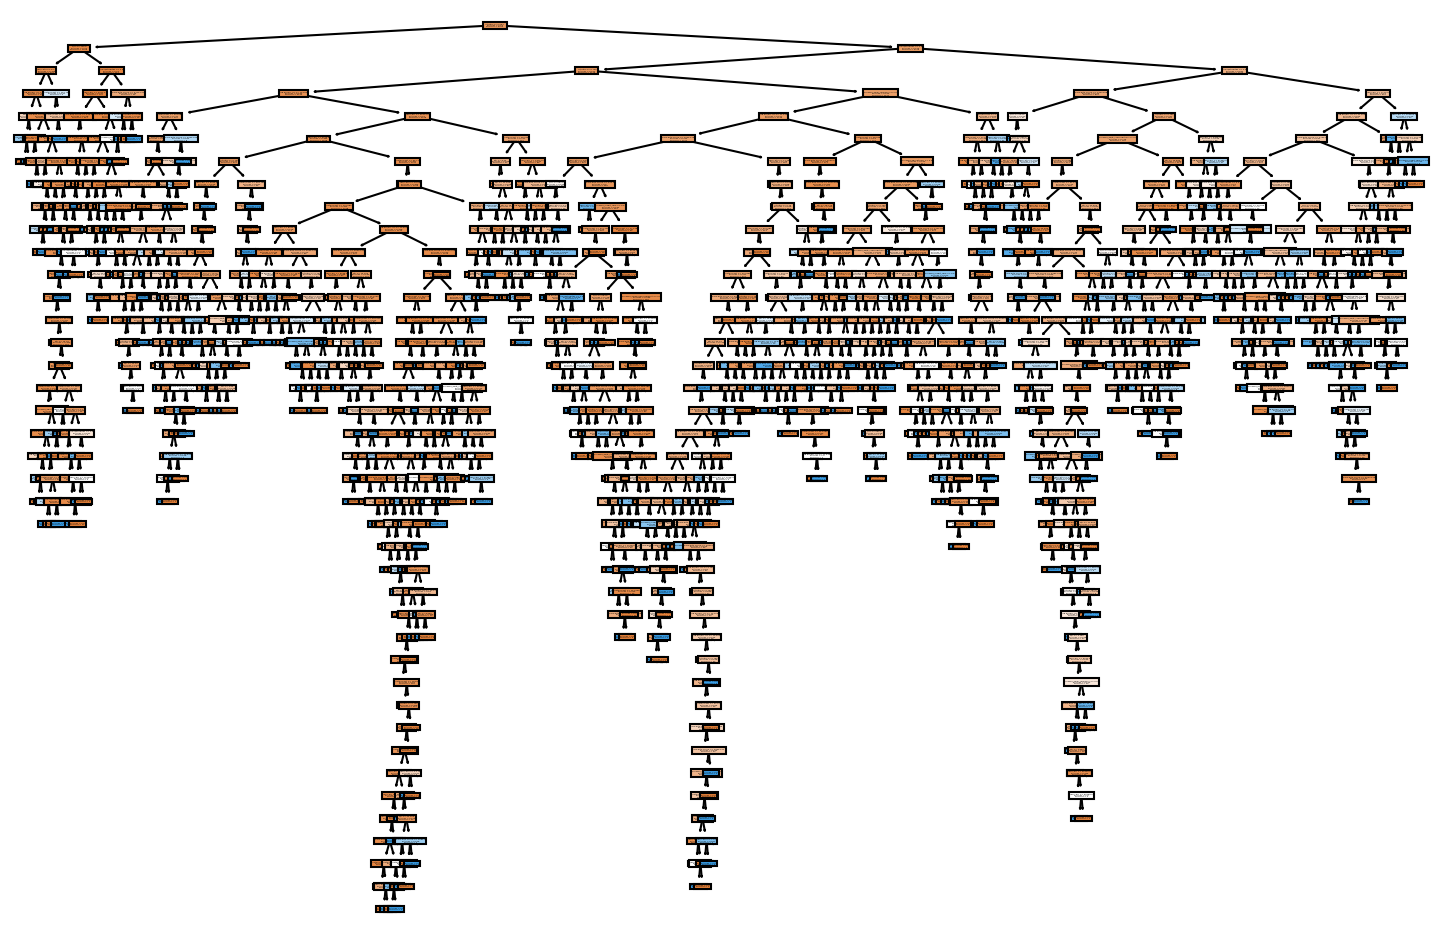

In [22]:
# entropy tree 
# creating entropy tree
entropy_tree = DecisionTreeClassifier(criterion = 'entropy')
# Fiting x train and y train
entropy_tree.fit(x_train,y_train)
# display
report_model(entropy_tree)

C:\Users\Khizar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2401
           1       0.00      0.00      0.00       473

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874





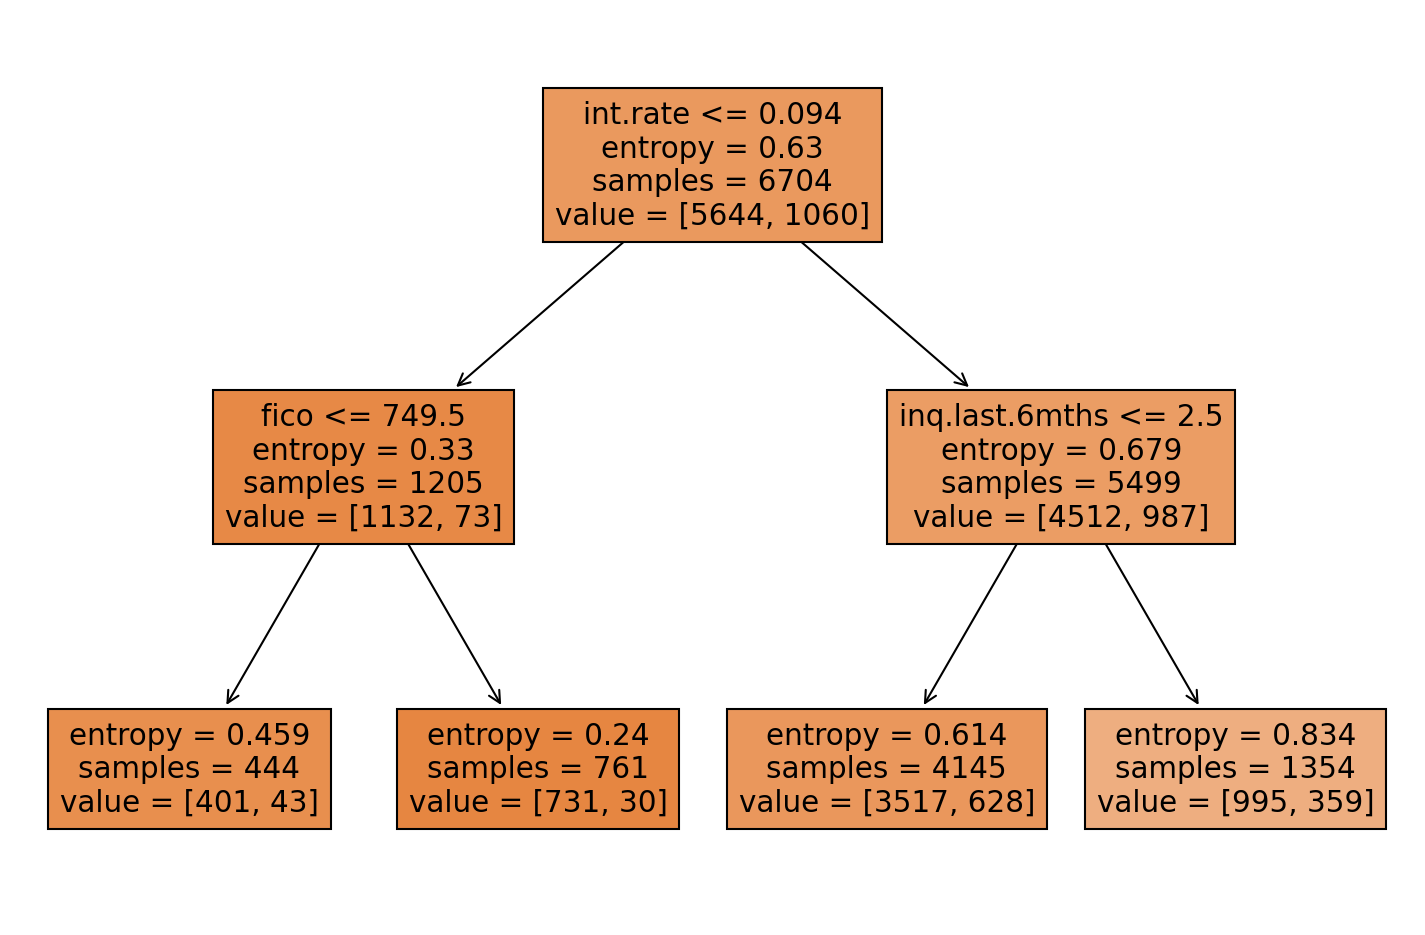

In [23]:
# instance of DecisionTreeClassifier
entropy_tree = DecisionTreeClassifier(criterion ='entropy', max_depth=2)
# Fit x train and y train
entropy_tree.fit(x_train,y_train)
# plotting first main parts
report_model(entropy_tree)